In [1]:
from __future__ import division
from __future__ import print_function

import msprime as msp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import itertools
import math
from mpl_toolkits.mplot3d import Axes3D

# sns.set_color_codes(palette='deep')
exp = np.exp
# multinomial = scipy.stats.multinomial

In [2]:
def log_stirling_choose(n,k):
    if n==k or k==0:
        return 1
    t1 = np.log(np.sqrt(n/(2*math.pi*k*(n-k))))
    t2 = n*np.log(n) - k*np.log(k) - (n-k)*np.log(n-k)
    return t1 + t2

def beta_binomial(k,n,a,b):
    ch = log_stirling_choose(n,k)
    num = scipy.special.betaln(k+a, n-k+b)
    den = scipy.special.betaln(a,b)
    
    return np.exp(ch + num - den)

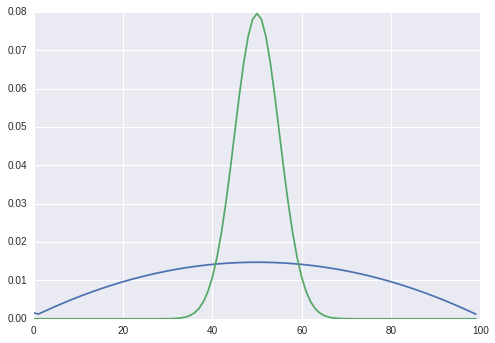

In [3]:
x = np.arange(0,100)
n = 100
a1 = 2
a2 = 10
p = 0.5
b1 = a1*(1-p)/p
b2 = a2*(1-p)/p


y = []
z = []
w = []
for i in x:
    y.append(beta_binomial(i,n,a1,b1))
    w.append(beta_binomial(i,n,a2,b2))
    rv = scipy.stats.binom(n,p)
    z.append(rv.pmf(i))

plt.plot(x,y)
plt.plot(x,z)
# plt.plot(x,w, color='Red')
plt.show()

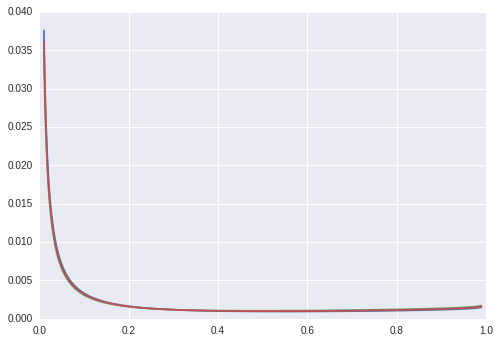

In [4]:
PI = math.pi
log = np.log

def log_stirling(n, k):
    if k == n or k == 0:
        lgs = 0
    else:
        lgs = (1 / 2) * (log(n) - log(2 * PI * k * (n - k)))
        lgs += n * log(n) - k * log(k) - (n - k) * log(n - k)

    return lgs

def log_beta(x, y):
    gml = scipy.special.gammaln
    return gml(x) + gml(y) - gml(x + y)

def log_likelihood(p, val):
    k = val[0]
    n = val[0] + val[1]
    return log_stirling(n, k) + k * log(p) + (n - k) * log(1 - p)

def beta_log_likelihood(p, val):
    k = val[0]
    n = val[0] + val[1]

    a = 4
    b = a*(1-p)/p

    return log_stirling(n, k) + log_beta(k + a, n - k + b) - log_beta(a, b)

pars = np.linspace(0.01,0.99,500)
obs1 = [(3600, 2600), (3650,2600), (3600, 2600), (3600, 2600)]
obs2 = [(2600, 3600), (2600,2800), (3600, 2600), (3600, 2600)]
#obs = [(3600, 2600)]

prob1 = [0 for _ in pars]
prob2 = prob1[:]

for o in obs1:
    for i, p in enumerate(pars):
        prob1[i] += beta_log_likelihood(p, o)

for o in obs2:
    for i, p in enumerate(pars):
        prob2[i] += beta_log_likelihood(p, o)
        

prob1 = prob1/sum(prob1)
prob2 = prob2/sum(prob2)

plt.plot(pars, prob1, pars, prob2, pars, (prob1+prob2)/2)
# plt.show()

# plt.plot(pars, prob2)
plt.show()
    

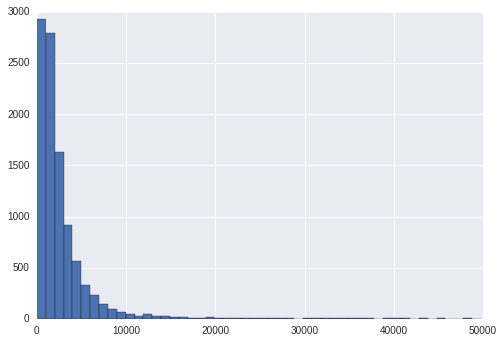

In [24]:
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scores = {}
lengths = {}
s =[]
l = []
data = []
for i in [2500]:
    scores[i] = []
    lengths[i] = []
    with open('../data/Pima_anzick_CK-13.out/Pima_anzick_CK-13.out.{}.txt'.format(i)) as f:   
        for line in f:
            if line.startswith('#'):
                continue
            line = line.rstrip().split('\t')
            pos = line[0][1:-1].split(', ')
            length = int(pos[1]) - int(pos[0]) #Is there supposed to be a +1 here?
            if length>50000: 
                continue
            l.append(length)
            score = line[-2]
            if score != '.':          
                data.append((length,int(score)))
                    
plt.hist(l, bins=50)                
# plt.hist(l, bins=50, cumulative=True, normed=True)
plt.show()

In [25]:
bins = list(np.linspace(100,50000,30))
# bins = bins
data = sorted(data, key=lambda entry: entry[0])
d_it = iter(data)
d = d_it.next()
blocks = []
for i, b in enumerate(bins):
    keep = []
    stay = True
    while d[0]<b and stay:
        keep.append(d[1])
        try:
            d = d_it.next()
        except StopIteration as e:
            stay = False
    blocks.append(keep)
    
for j,k in zip(bins, blocks):
    print(int(round(j)), len(k))
    
observations = {}

for i, length in enumerate(bins):
    dt = blocks[i]
    tmp = [i for i in dt if i>0]
    obs = (len(tmp), len(dt) - len(tmp))
    
    if i == 0:
        l = length//2
    else:
        l = (length + bins[i-1])//2
    
    observations[l] = obs

print(observations)

100 35
1821 3054
3541 1640
5262 672
6983 328
8703 156
10424 94
12145 58
13866 54
15586 35
17307 16
19028 14
20748 21
22469 13
24190 10
25910 12
27631 10
29352 4
31072 4
32793 6
34514 8
36234 5
37955 4
39676 3
41397 8
43117 5
44838 1
46559 4
48279 5
50000 2
{45698.0: (2, 3), 20748.0: (7, 1), 1820.0: (930, 710), 23329.0: (3, 1), 7843.0: (18, 17), 13865.0: (6, 4), 19887.0: (2, 1), 10424.0: (13, 8), 16446.0: (4, 0), 22468.0: (1, 0), 6982.0: (68, 26), 28491.0: (91, 65), 13005.0: (8, 4), 40536.0: (2, 4), 25050.0: (2, 0), 31072.0: (35, 19), 15586.0: (3, 1), 6122.0: (38, 20), 27631.0: (204, 124), 12144.0: (9, 1), 2681.0: (382, 290), 39675.0: (5, 3), 24189.0: (5, 0), 8703.0: (13, 3)}


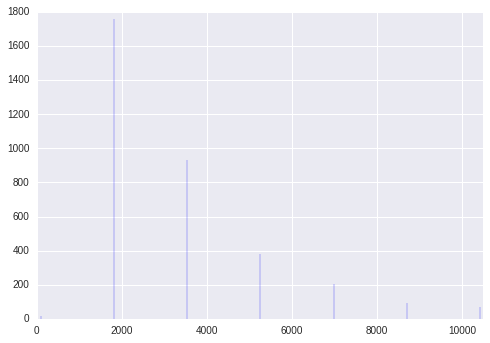

In [26]:
out = []
for j,k in zip(bins, blocks):
    count = 0
    if not k:
        out.append(0)
        continue
    for y in k:
        if y > 0:
            count += 1
    out.append(count)

plt.bar(bins,out, edgecolor='Blue')
plt.xlim(0,10500)
# plt.xscale('log')
plt.show()

In [27]:
# Check means

pos = [i for i in data if i[1]>0]
neg = [i for i in data if i[1]<0]
total = len(data)
print(len(pos), len(neg), len(pos)/total)


3652 2629 0.581436077058


In [28]:
def compare_theoretical_pop_matches(args):
    lmb1, lmb2 = 1/args['scale_1'], 1/args['scale_2']
    t1, t2 = (args['merge'] - args['join_1'])/(2*args['Ne']), (args['merge'] - args['join_2'])/(2*args['Ne'])
    
    if t1<0 or t2<0:
        raise Exception('Invalid join times: {}, {}'.format(t1,t2))
    
    p1 = args['ancestry_1']
    if 'ancestry_2' in args:
        p2 = args['ancestry_2']
        if p1 + p2 > 1:
            raise Exception('Ancestry proportions exceed 1')
        p0 = 1 - p1 - p2
    else:
        p2 = 1 - p1
        p0 = 0
    
    theta = 4*args['Ne']*args['mu']*args['length']
    B = (p0 + p1*exp(-t1/lmb1) + p2*exp(-t2/lmb2))
    d2 = 1 + theta/2
    
    A = {1:p1*exp(-t1/lmb1)/(lmb1 + 1),
         2:p2*exp(-t2/lmb2)/(lmb2 + 1)}
    d1 = {1: 1/lmb1 - theta/2,
          2: 1/lmb2 - theta/2}   
    t = {1: t1,
         2: t2}
    I0 = {1: p2*(1 - exp(-t2/lmb2)) + (2/3)*B,
          2: p1*(1 - exp(-t1/lmb1)) + (2/3)*B}
    lmb = {1:lmb1,
           2:lmb2}
    
    out = []
    for i in 1,2:
        I = I0[i]
        I += A[i]*(exp(d1[i]*t[i])-1)/d1[i] + A[i]*(exp(-d2*t[i])-1)/d2
        I += A[i]*(exp((1 + 1/lmb[i])*t[i])-1)*(exp(-(1 + theta/2)*t[i]))/d2
        I += B/(3*d2)
        out.append(1-I)
    return out[0]/(out[0] + out[1])
#     return out[0], out[1], (out[0]-out[1])/(out[0] + out[1]), out[0]/(out[0] + out[1])

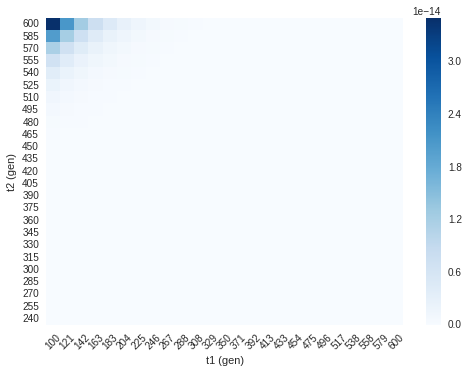

In [29]:
RES = 25

def normalisation(n,k):
    b1 = [100,600]
    b2 = [100,600]
    return scipy.integrate.nquad(lambda t1, t2: integrand(t1,t2, n, k), [b1, b2])


def posterior(p,obs):
    num = obs[0]*np.log(p) + obs[1]*np.log(1-p)
    x = 1 + obs[0]
    y = 1 + obs[1]
    beta = np.log(np.sqrt(2*math.pi)) + (x - 0.5)*np.log(x) + (y-0.5)*np.log(y) - (x + y-0.5)*np.log(x+y)
    return np.exp(num - beta)


def likelihood(p, val):
    k = val[0]
    n = val[0] + val[1]
    if k == n or k == 0:
        log_stirling = 0
    else:
        log_stirling = (1/2)*(np.log(n) - np.log(2*math.pi*k*(n-k)))
        log_stirling += n*np.log(n) - k*np.log(k) - (n-k)*np.log(n-k)

    return np.exp(log_stirling + k*np.log(p) + (n-k)*np.log(1-p))

def normed_likelihood(p, val):
    k = val[0]
    n = val[0] + val[1]
    j = n - k

    log_num = k*np.log(p) + (n-k)*np.log(1-p)
    k+=1
    j+=1
    log_beta = (1/2)*np.log(2*math.pi) + (k - 1/2)*np.log(k) + (j-1/2)*np.log(j) - (k + j-1/2)*np.log(k+j)  
    
    return np.exp(log_num - log_beta)

    
def update(T, obs, t1_vals, t2_vals):
    merge=600
        
    args = {'Ne':1e4, 
        'join_1':merge, 
        'join_2':merge,
        'merge':merge, 
        'ancestry_1':0.5,
        'ancestry_2':0.5,
        'scale_1':2, 
        'scale_2':1.5,
        'mu': 1.2e-8,
        'length':0}

    for row, t2 in enumerate(t2_vals):
        args['join_2'] = t2
        out = []
        for t1 in t1_vals:
            args['join_1'] = t1
            tmp = prior(t1,t2)
            for b, val in obs.items():
                args['length'] = b
                p = compare_theoretical_pop_matches(args)
                tmp *= normed_likelihood(p, val)
            out.append(tmp)
            
        T[row:] = out

    return T
        
def nround(vals):
    vals = list(vals)
    return [int(round(v)) for v in vals]


def prior(t1,t2):
    d = (600-240)*(600-100)
    return 1/d

t2_vals = np.linspace(500,600,RES)
t1_vals = np.linspace(240,600,RES)
T = np.ones((RES,RES))

# n = 3000
# k = 1520
# b = 2500
# # y = []


T = update(T, observations, t1_vals, t2_vals)

# print(T)

T = pd.DataFrame(T, index=nround(t1_vals), columns=nround(t2_vals))

axes = sns.heatmap(T, cmap='Blues')
axes.set_xlabel("t1 (gen)")
axes.set_ylabel("t2 (gen)")
axes.invert_yaxis()
axes.set_xticklabels(axes.get_xticklabels(),rotation=45)

plt.show()



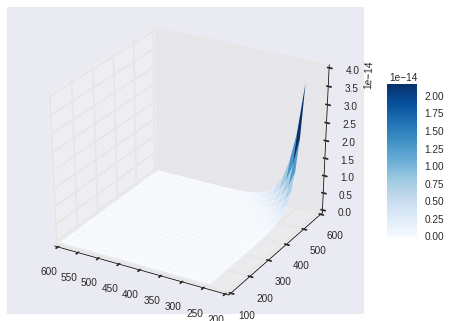

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')


X, Y = np.meshgrid(t1_vals, t2_vals)
surf = ax.plot_surface(X, Y, T, cmap='Blues', linewidth=0, rstride=1, cstride=1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.invert_xaxis()
plt.show()